# Exercises: Part III

We are going to read in some real data again and do some simple plots and analysis. Let's take a look at a monthly sea ice extent time series from the [National Snow and Ice Data Center](https://nsidc.org/data/seaice_index/archives). Sea ice extent is measured in 10$^6$ km$^2$. You can download your own copy of the `.csv` file [here](https://github.com/kls2177/ccia_files/blob/master/ice_monthly.csv.zip?raw=true).

The data consists of 3 columns: year, month and extent.

Follow along in your own jupyter notebook.

First, let's load in `NumPy` and `Matplotlib`. See if you can remember the syntax without peeking :)

In [1]:
# Import packages
import numpy as np
from matplotlib import pyplot as plt

Next, we will load in the data. To load in `.csv` files in `NumPy`, we can use the `np.genfromtxt()` function.

In [2]:
# Load Arctic sea ice data
ice = np.genfromtxt('ice_month.csv',delimiter=',')

I always like to take a look at my data before I do anything else. So, let's take a look at the shape. Type out how you would find the shape of `ice`.

In [3]:
# shape of ice
ice.shape

(531, 3)

What does the shape tell you about the data? What do the two dimensions represent?

### Introducing Datetime (Bonus section)

A date in Python is not a data type of its own, but the `datetime` package allows us to work with dates as **datetime objects**. Let's take a look at how it works in order to convert the year and month information that we have to a datetime object.

Let's extract the year and month from our array, `ice`. 

Note that to convert to a datetime object, the data type must be integer - so we will do a type conversion.

Try to extract the year and month data on your own by slicing the `ice` array. Use the [`np.astype()` funtion](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) to convert the data type to integer. Click to reveal if you get stuck.

In [4]:
# time components
year = ice[:,0].astype('int') # use .astype to convert the data type of an entire array
month = ice[:,1].astype('int')

# sea ice extent
SIE = ice[:,2]

Now, we will import the `datetime` package and create our [datetime object](https://numpy.org/doc/stable/reference/arrays.datetime.html).

In [5]:
import datetime

# loop over the elements of our time components
time = np.empty((ice.shape[0]),dtype='datetime64[M]') # M is for monthly data
for i in range(ice.shape[0]):
    # to create a datetime object we list things in order of year, month, day, hour, minute, second, etc.
    time[i] = datetime.datetime(year[i],month[i],day=1) # we use day=1 just as a place-holder
print(time[:])

['1978-10' '1978-11' '1978-12' '1979-01' '1979-02' '1979-03' '1979-04'
 '1979-05' '1979-06' '1979-07' '1979-08' '1979-09' '1979-10' '1979-11'
 '1979-12' '1980-01' '1980-02' '1980-03' '1980-04' '1980-05' '1980-06'
 '1980-07' '1980-08' '1980-09' '1980-10' '1980-11' '1980-12' '1981-01'
 '1981-02' '1981-03' '1981-04' '1981-05' '1981-06' '1981-07' '1981-08'
 '1981-09' '1981-10' '1981-11' '1981-12' '1982-01' '1982-02' '1982-03'
 '1982-04' '1982-05' '1982-06' '1982-07' '1982-08' '1982-09' '1982-10'
 '1982-11' '1982-12' '1983-01' '1983-02' '1983-03' '1983-04' '1983-05'
 '1983-06' '1983-07' '1983-08' '1983-09' '1983-10' '1983-11' '1983-12'
 '1984-01' '1984-02' '1984-03' '1984-04' '1984-05' '1984-06' '1984-07'
 '1984-08' '1984-09' '1984-10' '1984-11' '1984-12' '1985-01' '1985-02'
 '1985-03' '1985-04' '1985-05' '1985-06' '1985-07' '1985-08' '1985-09'
 '1985-10' '1985-11' '1985-12' '1986-01' '1986-02' '1986-03' '1986-04'
 '1986-05' '1986-06' '1986-07' '1986-08' '1986-09' '1986-10' '1986-11'
 '1986

You should see an array of dates printed to the screen. 

Now, let's plot sea ice extent as a function of time. Try it on your own and make a simple time series plot.

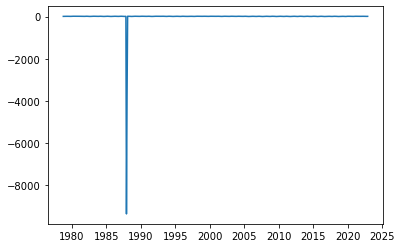

In [6]:
# Make a simple line plot
plt.plot(time,SIE)

What happened? Are you getting weird and *unphysical* results? 

Sometimes *missing data* is identified with large (positive or negative) integers. This is exactly what is happening with this data set - missing data are flagged with a -9999 value. Try to use a masked array to deal with this issue. You might have to google masked arrays to find the right function.

In [7]:
# mask values that are less than zero (negative values are unphysical)
SIE = np.ma.masked_less(SIE,0.0)

We can now plot our masked sea ice extent as a function of time.

Text(0.5, 1.0, 'Arctic Sea Ice Extent')

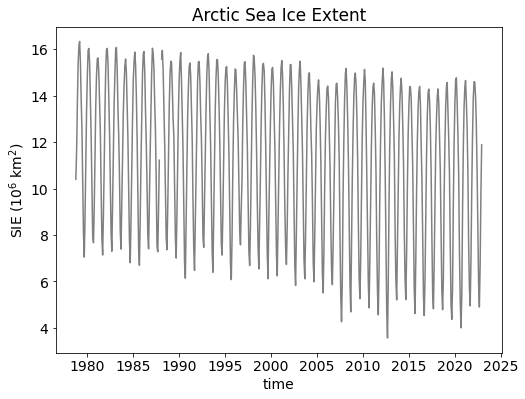

In [8]:
# Plot sea ice extent (SIE) time series
plt.figure(figsize=(8,6))

# change font size
plt.rcParams.update({'font.size': 14})

# plot data
plt.plot(time,SIE,'gray')

# title, labels, etc.
plt.xlabel('time')
plt.ylabel('SIE (10$^6$ km$^2$)')
plt.title('Arctic Sea Ice Extent')

You can see a gap in the data where the missing data is masked.

Does this plot make physical sense? Consider the seasonal cycle of Arctic sea ice and the long-term trend.

## Trend Analysis

One of the key indicators of climate change is Arctic sea ice loss. Typically, Arctic sea ice extent in **September** is used to show the dramatic loss of sea ice, as September is the month when the sea ice extent is at its minimum.

Use a loop and a conditional to extract the September data. 

In [9]:
# loop and conditional to extract September data
SIE_sept = []
for i in range(len(SIE)):
    if month[i] == 9:
        SIE_sept.append(SIE[i]) # I chose to use a list because I didn't know a priori how many elements I would get

In [10]:
# Here is an alternative way to do the above without a loop (there are so many cool short-cuts!)
SIE_sept = SIE[month == 9]

Once you have only September data, make a time series plot of September Arctic SIE. You will need to define a new x-coordinate.

Text(0.5, 1.0, 'September Arctic Sea Ice Extent')

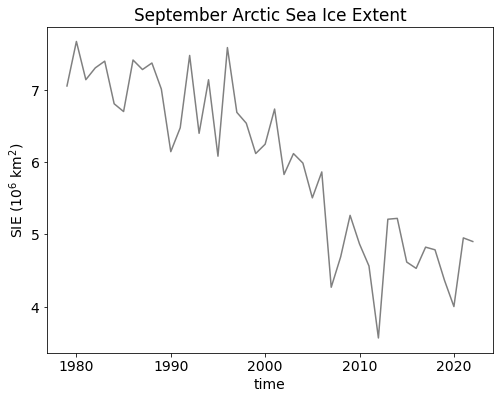

In [11]:
# define years with September data
year_sept = year[month == 9]

# Plot sea ice extent (SIE) time series
plt.figure(figsize=(8,6))

# change font size
plt.rcParams.update({'font.size': 14})

plt.plot(year_sept,SIE_sept,'gray')

# title, labels, etc.
plt.xlabel('time')
plt.ylabel('SIE (10$^6$ km$^2$)')
plt.title('September Arctic Sea Ice Extent')

Now, let's use the `np.polyfit()` and `np.polyval()` functions again and this time we will test out different polynomial fits. Try n = 1, 2 and 3 and add all of the fits to the plot above. Also add the slope of the n = 1 line in the legend in units of 10$^6$ km$^2$ per **decade**.

In [12]:
# polynomial fits

# n = 1
a1 = np.polyfit(year_sept,SIE_sept,1)
SIE_sept_n1 = np.polyval(a1,year_sept)

# n = 2
a2 = np.polyfit(year_sept,SIE_sept,2)
SIE_sept_n2 = np.polyval(a2,year_sept)

# n = 3
a3 = np.polyfit(year_sept,SIE_sept,3)
SIE_sept_n3 = np.polyval(a3,year_sept)

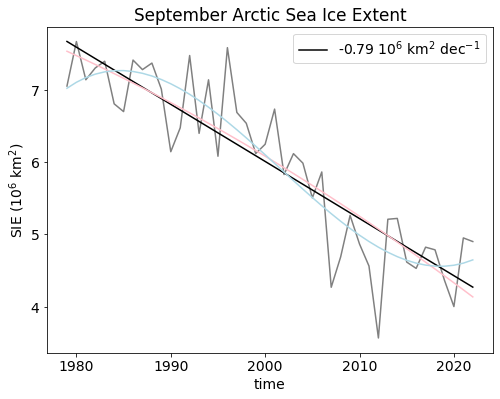

In [13]:
# Plot sea ice extent (SIE) time series
plt.figure(figsize=(8,6))

# change font size
plt.rcParams.update({'font.size': 14})

plt.plot(year_sept,SIE_sept,'gray')
plt.plot(year_sept,SIE_sept_n1,'k',label=str(np.round(10*a1[0],2))+ " 10$^6$ km$^2$ dec$^{-1}$")
plt.plot(year_sept,SIE_sept_n2,color ='pink')
plt.plot(year_sept,SIE_sept_n3,color='lightblue')

# title, labels, etc.
plt.xlabel('time')
plt.ylabel('SIE (10$^6$ km$^2$)')
plt.title('September Arctic Sea Ice Extent')
plt.legend(loc='upper right')

**To get GPD credit for this workshop, please attempt the following additional exercises:**
* plot the time series of March Arctic SIE (save this plot as a .png file for upload using `plt.savefig()` (you may need to Google this function). Compare the magnitude of the trends in March (the Arctic SIE maximum) and September.
* calculate the *R*-squared for the March and September trends (refer to the pervious exercise using the Argo data).
* compute the climatological (i.e., average over all years) seasonal cycle of SIE and plot it. This is a plot of SIE as a function of month and each month represents the mean over all years. (Hint: Remove the year 1978 by using slicing (this is not a complete year) and then use `np.reshape()` to create an array for SIE with two dimensions: (year,month). Next, calculate the mean over the appropriate dimension using `np.mean(...,axis=...)`. Finally, plot the climatological mean SIE as a function of month. We looked at examples of the reshape function in Module 2, Exercises: Part I. Here is an [example](https://globalcryospherewatch.org/state_of_cryo/seaice/osisaf_nh_sie_daily-2years.png) of what this plot should roughly look like (but only one curve).